# Import Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load data

In [92]:
data = pd.read_csv('titanic_train.csv')


# Data Summary

In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [95]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling null Values

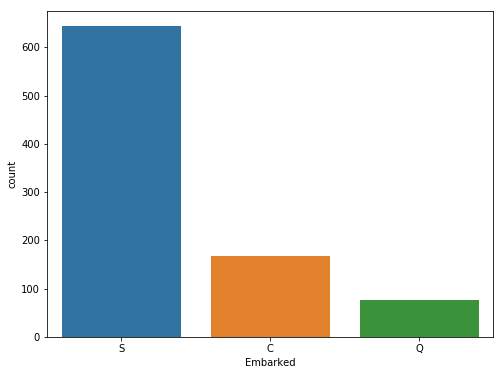

In [97]:
plt.figure(figsize = (8,6))
sns.countplot(x='Embarked',data=data)

In [98]:
data['Embarked'][data['Embarked'].isnull()]='S'

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
data['Embarked'].isnull().sum()

0

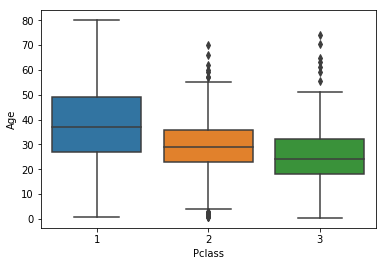

In [100]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [101]:
data['Age'][data['Age'].isnull()]=data['Age'].mean()

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
data['Age'].isnull().sum()

0

In [103]:
data['Has Cabin']= data['Cabin'].apply(lambda x:0 if isinstance(x,float) else 1)

In [104]:
data['Survived'].isnull().sum()

0

In [105]:
data['Survived'].fillna(value=0,inplace=True)

In [106]:
data['Fare'][data['Fare'].isnull()]= data['Fare'].mean()

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has Cabin        0
dtype: int64

# Visualisation

Percentage of Male Survived:  18.890814558058924
Percentage of Female Survived:  74.20382165605095


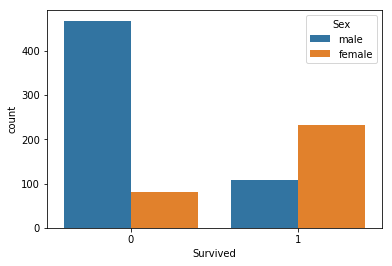

In [108]:
sns.countplot(x='Survived',data=data,hue='Sex')
print('Percentage of Male Survived: ',data['Survived'][data['Sex']=='male'].value_counts(normalize=True)[1]*100)
print('Percentage of Female Survived: ',data['Survived'][data['Sex']=='female'].value_counts(normalize=True)[1]*100)

Percentage of class 1 passenger Survived:  62.96296296296296
Percentage of class 2 passenger Survived:  47.28260869565217
Percentage of class 3 passenger Survived:  24.236252545824847


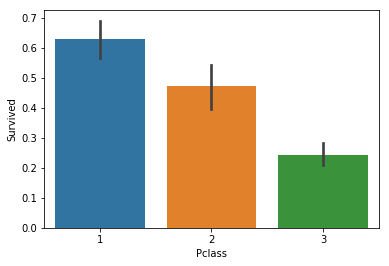

In [109]:
sns.barplot(x='Pclass',y='Survived',data=data)
print('Percentage of class 1 passenger Survived: ',data['Survived'][data['Pclass']== 1].value_counts(normalize=True)[1]*100)
print('Percentage of class 2 passenger Survived: ',data['Survived'][data['Pclass']== 2].value_counts(normalize=True)[1]*100)
print('Percentage of class 3 passenger Survived: ',data['Survived'][data['Pclass']== 3].value_counts(normalize=True)[1]*100)


Percentage of passengers have Cabin & Survived:  66.66666666666666
Percentage of passengers dont have Cabin & Survived:  29.985443959243085


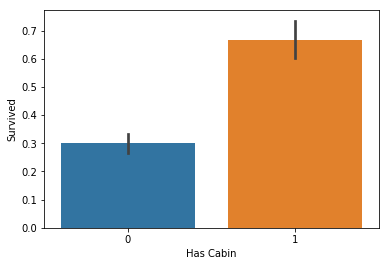

In [110]:
sns.barplot(x='Has Cabin',y='Survived',data=data)
print('Percentage of passengers have Cabin & Survived: ',data['Survived'][data['Has Cabin']== 1].value_counts(normalize=True)[1]*100)
print('Percentage of passengers dont have Cabin & Survived: ',data['Survived'][data['Has Cabin']== 0].value_counts(normalize=True)[1]*100)

percentage of P embarked from S:  True     72.502806
False    27.497194
Name: Embarked, dtype: float64
percentage of P embarked from C:  False    81.144781
True     18.855219
Name: Embarked, dtype: float64
percentage of P embarked from Q:  False    91.358025
True      8.641975
Name: Embarked, dtype: float64


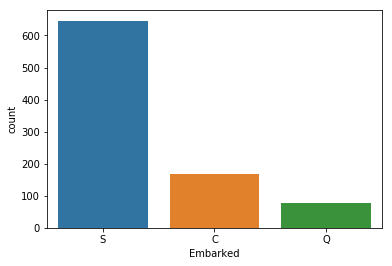

In [111]:
sns.countplot(x='Embarked',data=data)
print('percentage of P embarked from S: ', ((data['Embarked']=='S').value_counts())/(data['Embarked'].count())*100)
print('percentage of P embarked from C: ', ((data['Embarked']=='C').value_counts())/(data['Embarked'].count())*100)
print('percentage of P embarked from Q: ', ((data['Embarked']=='Q').value_counts())/(data['Embarked'].count())*100)


Percentage of S embarked survived:  33.90092879256966
Percentage of Q embarked survived:  38.961038961038966
Percentage of C embarked survived:  55.35714285714286


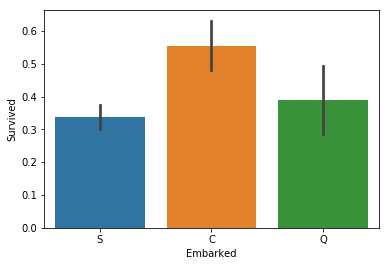

In [112]:
sns.barplot(x='Embarked',y='Survived',data=data)
print('Percentage of S embarked survived: ',data['Survived'][data['Embarked']=='S'].value_counts(normalize=True)[1]*100)
print('Percentage of Q embarked survived: ',data['Survived'][data['Embarked']=='Q'].value_counts(normalize=True)[1]*100)
print('Percentage of C embarked survived: ',data['Survived'][data['Embarked']=='C'].value_counts(normalize=True)[1]*100)


# Feature Engineering

In [113]:
import random
random.sample(list(data['Name'].values),10)
data['Title']=Titles=data['Name'].apply(lambda x: x.split(',')[1].split('.')[0] if ',' in x else x)
data['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Sir               1
 Capt              1
 Don               1
 Mme               1
 the Countess      1
 Lady              1
 Jonkheer          1
 Ms                1
Name: Title, dtype: int64

In [114]:
def map_marriage(Title):
    Title = Title.strip()
    if Title in ['Dr', 'Col', 'Capt','Major','Don','Rev','Dona','Jonkheer']:
        return 0
    if Title in ['the Countess', 'Lady', 'Sir']:
        return 1
    if Title in ['Mlle','Ms','Miss']:
        return 2
    if Title in ['Mrs']:
        return 3
    if Title in ['Mr','Master','Mme']:
        return 4

In [115]:
data['Title']=data['Title'].apply(map_marriage)

In [116]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,4


In [117]:
data['Male']=data['Sex'].map({'male':1,'female':0})

In [118]:
data['FamSize']=data['SibSp'] + data['Parch']+1

In [119]:
def map_age(Age):
    if Age <=12:
        return 'Child'
    elif 12 < Age <=18:
        return 'Teenager'
    elif 18 < Age <=50:
        return 'Adult'
    else:
        return 'Old'

In [120]:
data['Age']=data['Age'].apply(map_age)

In [121]:
data['Age'] = data['Age'].map({'Child':1,'Teenager':2,'Adult':3,'Old':4})

In [122]:
def impute_fare(Fare):
    if Fare <=20:
        return 1
    if 20 < Fare <=40:
        return 2
    if Fare > 40:
        return 3

In [123]:
data['Fare'] = data['Fare'].apply(impute_fare)

In [124]:
data['Embarked'] = data['Embarked'].map({'S':1,'C':2,'Q':3})

In [411]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,Title,Male,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,1,NaN,1,0,4,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,2,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,1,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,1,1,3,0,2
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,1,0,4,1,1


In [412]:
df_data = data.drop(['PassengerId','Name','Sex','Ticket','Cabin','Has Cabin','SibSp','Parch'],axis=1)

In [413]:
df_data.head()

,Survived,Pclass,Age,Fare,Embarked,Title,Male,FamSize
0,0,3,3,1,1,4,1,2
1,1,1,3,3,2,3,0,2
2,1,3,3,1,1,2,0,1
3,1,1,3,3,1,3,0,2
4,0,3,3,1,1,4,1,1


# Machine Learning Algorithm 

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
X=df_data.drop(['Survived'],axis=1)
y= df_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=50)

# Logistic Regression

In [416]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [417]:
pred_logmodel = logmodel.predict(X_test)

In [418]:
from sklearn.metrics import accuracy_score, classification_report
acc_logmodel = round(accuracy_score(pred_logmodel,y_test)*100,2)
print('Accuracy of Logmodel is: ',acc_logmodel)
print(classification_report(pred_logmodel,y_test))

Accuracy of Logmodel is:  82.22
             precision    recall  f1-score   support

          0       0.94      0.71      0.81        24
          1       0.74      0.95      0.83        21

avg / total       0.85      0.82      0.82        45



# Support Vector Machine (SVM)

In [419]:
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [420]:
pred_SVM = SVM_model.predict(X_test)

In [421]:
acc_SVM_model = round(accuracy_score(pred_SVM,y_test)*100,2)
print('Accuracy of SVM_model is: ',acc_SVM_model)
print(classification_report(pred_logmodel,y_test))

Accuracy of SVM_model is:  80.0
             precision    recall  f1-score   support

          0       0.94      0.71      0.81        24
          1       0.74      0.95      0.83        21

avg / total       0.85      0.82      0.82        45



# Decision Tree

In [422]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [423]:
pred_DT = DT_model.predict(X_test)

In [424]:
acc_DT_model = round(accuracy_score(pred_DT,y_test)*100,2)
print('Accuracy of DT_model is: ',acc_DT_model)
print(classification_report(pred_DT,y_test))

Accuracy of DT_model is:  80.0
             precision    recall  f1-score   support

          0       0.89      0.70      0.78        23
          1       0.74      0.91      0.82        22

avg / total       0.82      0.80      0.80        45



# Random Forest

In [425]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [426]:
pred_RF = RF_model.predict(X_test)

In [427]:
acc_RF_model = round(accuracy_score(pred_RF,y_test)*100,2)
print('Accuracy of RF_model is: ',acc_RF_model)
print(classification_report(pred_RF,y_test))

Accuracy of RF_model is:  84.44
             precision    recall  f1-score   support

          0       0.94      0.74      0.83        23
          1       0.78      0.95      0.86        22

avg / total       0.86      0.84      0.84        45



# K Nearest Neighbors

In [428]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
pred_KNN = KNN_model.predict(X_test)
acc_KNN_model = round(accuracy_score(pred_KNN,y_test)*100,2)
print('Accuracy of KNN_model is: ',acc_KNN_model)
print(classification_report(pred_KNN,y_test))

Accuracy of KNN_model is:  80.0
             precision    recall  f1-score   support

          0       0.89      0.70      0.78        23
          1       0.74      0.91      0.82        22

avg / total       0.82      0.80      0.80        45



# Model Evaluation 

In [429]:
models = pd.DataFrame({'Model':['Support Vector Machines','Random Forest','Decision Tree','Logistic Regression','K Nearest'],
                      'Score':[acc_SVM_model,acc_RF_model,acc_DT_model,acc_logmodel,acc_KNN_model]
                      }).sort_values(by='Score',ascending=False)

In [430]:
models

,Model,Score
1,Random Forest,84.44
3,Logistic Regression,82.22
0,Support Vector Machines,80.00
2,Decision Tree,80.00
4,K Nearest,80.00


# Import Test Data and Do all the Feature Engg. done on Training Data

In [431]:
test_data = pd.read_csv('titanic_test.csv')

In [432]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [433]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [434]:
test_data['Age'][test_data['Age'].isnull()] = test_data['Age'].mean()
test_data['Fare'][test_data['Fare'].isnull()] = test_data['Fare'].mean()

C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\JASKARN SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [435]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [436]:
import random
random.sample(list(test_data['Name'].values),10)
test_data['Title']=Titles=test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0] if ',' in x else x)
test_data['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Dr          1
 Dona        1
 Ms          1
Name: Title, dtype: int64

In [437]:
def map_marriage(Title):
    Title = Title.strip()
    if Title in ['Dr', 'Col', 'Capt','Major','Don','Rev','Dona','Jonkheer']:
        return 0
    if Title in ['the Countess', 'Lady', 'Sir']:
        return 1
    if Title in ['Mlle','Ms','Miss']:
        return 2
    if Title in ['Mrs']:
        return 3
    if Title in ['Mr','Master','Mme']:
        return 4

In [438]:
test_data['Title'] = test_data['Title'].apply(map_marriage)

In [439]:
test_data['Male']=test_data['Sex'].map({'male':1,'female':0})

In [440]:
def map_age(Age):
    if Age <=12:
        return 'Child'
    if 12 < Age <=18:
        return 'Teenager'
    if 18 < Age <=50:
        return 'Adult'
    if Age >50:
        return 'Old'

In [441]:
test_data['Age'] = test_data['Age'].apply(map_age)
test_data['Age'] = test_data['Age'].map({'Child':1,'Teenager':2,'Adult':3,'Old':4})

In [442]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Male
0,892,3,"Kelly, Mr. James",male,3,0,0,330911,7.8292,NaN,Q,4,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,7.0000,NaN,S,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,4,0,0,240276,9.6875,NaN,Q,4,1
3,895,3,"Wirz, Mr. Albert",male,3,0,0,315154,8.6625,NaN,S,4,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3,1,1,3101298,12.2875,NaN,S,3,0


In [443]:
test_data['Embarked'] = test_data['Embarked'].map({'S':1,'Q':2,'C':3})

In [444]:
def impute_fare(Fare):
    if Fare <=20:
        return 1
    if 20 < Fare <=40:
        return 2
    if Fare > 40:
        return 3

In [445]:
test_data['Fare'] = test_data['Fare'].apply(impute_fare)

In [446]:
test_data['Fare'].unique()

array([1, 2, 3], dtype=int64)

In [447]:
test_data['FamSize'] = test_data['SibSp'] + test_data['Parch'] +1

In [448]:
test_data['Has Cabin'] = test_data['Cabin'].apply(lambda x: 0 if isinstance(x,float) else 1)

In [449]:
test_data['Has Cabin'][test_data['Has Cabin']==1].count()

91

In [452]:
df_test = test_data.drop(['PassengerId','Name','Sex','Ticket','Cabin','Has Cabin','SibSp','Parch'],axis=1)

In [453]:
test_data['Survived'] = RF_model.predict(df_test)

In [454]:
test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Male,FamSize,Has Cabin,Survived
0,892,3,"Kelly, Mr. James",male,3,0,0,330911,1,NaN,2,4,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,1,NaN,1,3,0,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,4,0,0,240276,1,NaN,2,4,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,3,0,0,315154,1,NaN,1,4,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3,1,1,3101298,1,NaN,1,3,0,3,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,2,0,0,7538,1,NaN,1,4,1,1,0,0
6,898,3,"Connolly, Miss. Kate",female,3,0,0,330972,1,NaN,2,2,0,1,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,3,1,1,248738,2,NaN,1,4,1,3,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,2,0,0,2657,1,NaN,3,3,0,1,0,1
9,901,3,"Davies, Mr. John Samuel",male,3,2,0,A/4 48871,2,NaN,1,4,1,3,0,0


In [455]:
submission = test_data[['PassengerId','Survived']]

In [456]:
submission.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [457]:
submission.to_csv('New Submission.csv',index=False)